# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# Firstly execute get request
response_data = requests.get(btc_url) 
# Store response using content attribute
btc_content = response_data.content
# Format data as JSON
btc_data = response_data.json()
# Format data with json.dumps and display using indent so it is readable
import json
print(json.dumps(btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19017931,
            "total_supply": 19017931,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42690.0,
                    "volume_24h": 28544278949,
                    "market_cap": 812273240057,
                    "percentage_change_1h": -0.0592047679192529,
                    "percentage_change_24h": 2.5449831786853,
                    "percentage_change_7d": 3.60388884926789,
                    "percent_change_1h": -0.0592047679192529,
                    "percent_change_24h": 2.5449831786853,
                    "percent_change_7d": 3.60388884926789
                },
                "CAD": {
                    "price": 53311.272,
                    "volume_24h": 35646095551.5112,
                    "m

In [6]:
# Fetch the BTC price relative to CAD
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(f"BTC Price in CAD: ${btc_price}")

BTC Price in CAD: $53311.272


In [7]:
# Fetch current ETH price
# Firstly execute get request
eth_response_data = requests.get(eth_url)
# Store response using content attribute
eth_content = eth_response_data.content
# Format data as JSON
eth_data = eth_response_data.json()
# Format data with json.dumps and display using indent so it is readable
import json
# Fetch ETH price relative to CAD
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(f"ETH Price in CAD: ${eth_price}")

ETH Price in CAD: $3942.311744


In [8]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

In [9]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63973.53
The current value of your 5.3 ETH is $20894.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Load .env environment variables
load_dotenv()

True

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Print Alpaca key types
print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Type: <class 'str'>


In [13]:
# Format current date as ISO format
today = pd.Timestamp("2022-04-01", tz="America/New_york").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio.head(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.95,106.25,106.75,11579091,40126,106.667931,AGG
2022-04-01 04:00:00+00:00,453.30,453.46,449.14,452.92,88676014,624745,451.850848,SPY


In [14]:
# Reorganize the DataFrame
# Separate ticker data
AAG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Print to display DF
df_portfolio.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.95,106.25,106.75,11579091,40126,106.667931,AGG
2022-04-01 04:00:00+00:00,453.30,453.46,449.14,452.92,88676014,624745,451.850848,SPY


In [15]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AAG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()

AGG                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-04-01 04:00:00+00:00  106.35  106.95  106.25  106.75  11579091   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2022-04-01 04:00:00+00:00       40126  106.667931  453.3  453.46  449.14   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-01 04:00:00+00:00  452.92  88676014      624745  451.850848

In [16]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"]
spy_close_price = df_portfolio["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2022-04-01 04:00:00+00:00    106.75
Name: close, dtype: float64
Current SPY closing price: $timestamp
2022-04-01 04:00:00+00:00    452.92
Name: close, dtype: float64


In [17]:
# Compute the current value of shares
my_agg_value = float(agg_close_price * my_agg)
my_spy_value = float(spy_close_price * my_spy)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22646.00
The current value of your 200 AGG shares is $21350.00


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = (my_btc_value) + (my_eth_value)
shares_amount = (my_agg_value) + (my_spy_value)

# Set current amount of shares
df_savings = {
    "amount": [(crypto_amount), (shares_amount)]
}

# Set the tickers
tickers = ["crypto","shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(df_savings, index=tickers)

# Display savings DataFrame
df_savings

,amount
crypto,84867.778643
shares,43996.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

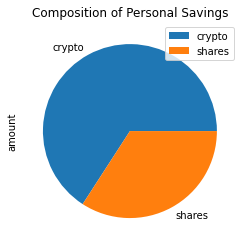

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_amount + shares_amount

# Validate saving health
if emergency_fund < total_savings:
    print("Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You have {(emergency_fund) - (total_savings)} left to reach your goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [23]:
# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
mc_sim.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 110.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 120.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 130.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 140.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 150.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 160.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 170.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 180.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 190.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 200.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 210.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 220.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 230.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 240.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 250.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 260.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 270.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 280.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 290.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 300.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 310.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 320.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 330.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 340.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 350.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 360.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 370.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 380.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 390.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 400.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 410.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 420.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

KeyboardInterrupt: 

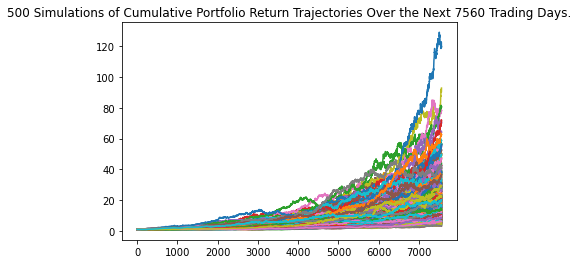

In [69]:
# Plot simulation outcomes
lined_plot = mc_sim.plot_simulation()

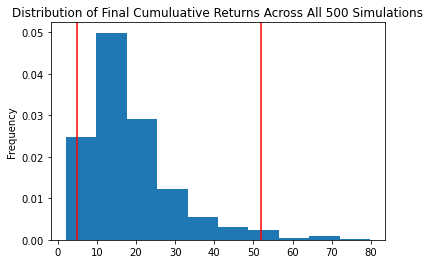

In [30]:
# Plot probability distribution and confidence intervals
dist_plot = mc_sim.plot_distribution()

### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_mc = mc_sim.summarize_cumulative_return()

# Print summary statistics
print(stats_mc)

count           500.000000
mean             18.823909
std              11.720892
min               2.045856
25%              11.140793
50%              15.826237
75%              23.185891
max              79.846897
95% CI Lower      4.926509
95% CI Upper     52.030981
Name: 7560, dtype: float64


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats_mc[8]*initial_investment,2)
ci_upper = round(stats_mc[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98530.18 and $1040619.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_mc[8]*initial_investment,2)
ci_upper = round(stats_mc[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $147795.27 and $1560929.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [49]:
# Printing the simulation input data
mc_sim_five.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [50]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 110.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 120.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 130.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 140.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 150.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 160.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 170.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 180.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 190.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 200.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 210.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 220.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 230.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 240.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 250.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 260.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 270.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 280.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 290.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 300.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 310.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 320.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 330.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 340.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 350.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 360.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 370.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 380.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 390.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 400.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 410.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 420.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 430.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 440.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 450.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 460.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 470.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 480.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 490.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003755,0.996767,0.997292,0.994344,1.003277,1.000462,1.009649,0.993087,0.987532,1.004089,...,1.016337,1.014641,0.998296,1.005256,1.000278,1.002823,1.022550,1.019353,0.999319,0.999635
2,1.011961,0.997343,0.992154,0.994323,1.006424,1.003714,1.028251,0.985455,0.999077,0.991311,...,1.011758,1.017917,0.994041,1.015510,1.004637,1.019029,1.017526,1.025262,1.012530,0.996077
3,1.003884,0.992656,1.011383,1.006540,1.003062,1.002244,1.034424,0.985397,0.997093,0.996216,...,1.006950,1.030631,0.994352,1.000131,1.014587,1.023444,1.011708,1.041942,1.011484,0.994855
4,1.004652,0.995015,1.010038,1.006640,1.016511,0.989563,1.027446,0.970974,0.987881,0.999390,...,1.000625,1.041441,1.001682,0.989531,1.013555,1.011252,1.016136,1.040663,1.007063,0.983690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.151913,1.240199,1.566773,2.306802,1.417982,1.980984,2.802488,1.367563,1.437328,2.515129,...,1.726686,2.138069,1.826172,1.248422,0.856924,1.940577,3.089668,1.897696,3.862265,2.475431
1257,3.171383,1.241169,1.566094,2.277567,1.414310,2.009827,2.797441,1.366808,1.455700,2.543014,...,1.728289,2.154846,1.810541,1.240200,0.842918,1.972797,3.080636,1.881729,3.889275,2.470145
1258,3.192741,1.262871,1.574934,2.294205,1.445371,1.993865,2.762162,1.360471,1.436529,2.515405,...,1.733323,2.143346,1.819807,1.236190,0.849067,1.991973,3.055229,1.919781,3.921938,2.468698
1259,3.175512,1.276452,1.598573,2.274092,1.450311,2.006817,2.734745,1.347704,1.438042,2.525528,...,1.715420,2.132536,1.799142,1.220333,0.848183,2.005585,3.045795,1.946178,3.971041,2.505069


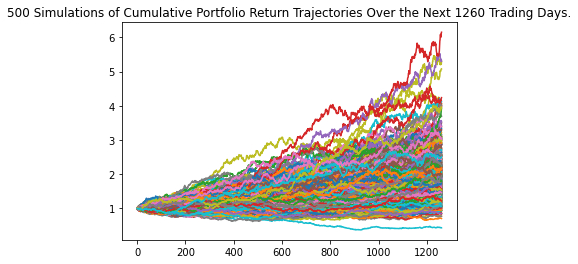

In [51]:
# Plot simulation outcomes
lined_plot_five = mc_sim_five.plot_simulation()

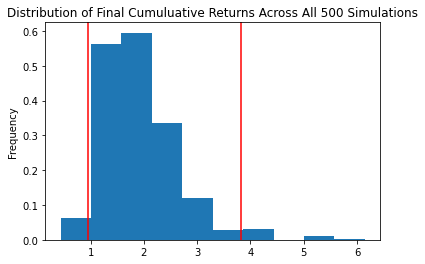

In [52]:
# Plot probability distribution and confidence intervals
dist_plot_five = mc_sim_five.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_mc_five = mc_sim_five.summarize_cumulative_return()

# Print summary statistics
print(stats_mc_five)

count           500.000000
mean              1.917770
std               0.719296
min               0.435282
25%               1.427465
50%               1.758686
75%               2.272460
max               6.147637
95% CI Lower      0.956235
95% CI Upper      3.815036
Name: 1260, dtype: float64


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [54]:
# Set initial investment
er_initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_mc_five[8]*er_initial_investment,2)
ci_upper_five = round(stats_mc_five[9]*er_initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $57374.08 and $228902.17


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Printing the simulation input data
mc_sim_ten.portfolio_data.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 110.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 120.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 130.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 140.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 150.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 160.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 170.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 180.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 190.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 200.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 210.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 220.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 230.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 240.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 250.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 260.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 270.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 280.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 290.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 300.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 310.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 320.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 330.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 340.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 350.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 360.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 370.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 380.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 390.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 400.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 410.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 420.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 430.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 440.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 450.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 460.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 470.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 480.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

Running Monte Carlo simulation number 490.


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\thoma\Boo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989041,1.006559,1.005880,0.998190,0.987696,0.983114,0.992732,1.000360,0.992395,1.011606,...,1.017652,1.001172,1.004140,0.987648,1.000390,1.003615,1.000819,0.995389,0.993197,1.020952
2,0.968431,0.990988,1.013841,1.016306,0.987082,0.978984,0.993379,0.994502,0.981162,1.014232,...,1.016131,1.001178,1.008874,0.987851,0.984576,1.007796,1.002282,1.004851,0.987886,1.003439
3,0.957663,0.970820,1.025353,1.011666,1.002285,0.982091,0.993134,0.998949,0.980351,1.017324,...,1.018642,1.009828,1.006256,0.996517,0.998949,1.009826,1.018532,1.003339,0.969490,0.999736
4,0.966903,0.973818,1.017067,1.025587,1.001088,0.990775,0.991407,0.993274,0.975702,1.033652,...,1.032280,1.007949,1.010100,0.981689,1.003684,1.001260,1.025863,1.010461,0.955852,1.018156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.061643,1.495787,1.717802,2.333450,2.319479,1.484697,2.024016,3.237258,0.896230,1.131941,...,1.633614,1.924172,1.416864,1.609498,2.188336,1.907715,2.362442,1.426202,2.322942,1.547396
1257,1.065762,1.526122,1.713458,2.340967,2.323319,1.483555,2.042864,3.250088,0.893391,1.120098,...,1.627638,1.927111,1.403271,1.650352,2.214180,1.941064,2.352534,1.422147,2.334593,1.557423
1258,1.055953,1.520195,1.734028,2.283679,2.347855,1.501201,2.049213,3.301552,0.891513,1.111526,...,1.645551,1.963552,1.408391,1.649389,2.220988,1.942759,2.381230,1.441260,2.313184,1.562375
1259,1.051190,1.521229,1.728624,2.256026,2.383924,1.484994,2.039955,3.305072,0.890689,1.105720,...,1.602900,1.972332,1.404110,1.651436,2.238000,1.907207,2.412184,1.450357,2.338151,1.560140


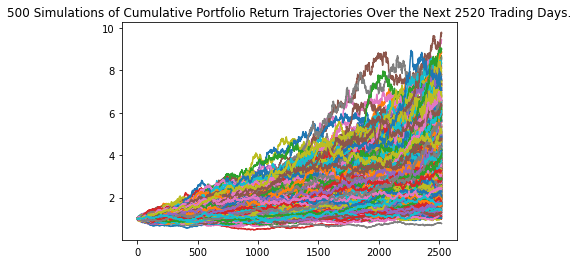

In [62]:
# Plot simulation outcomes
lined_plot_ten = mc_sim_ten.plot_simulation()

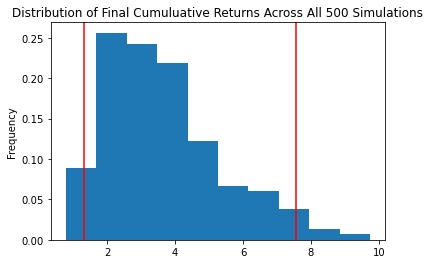

In [63]:
# Plot probability distribution and confidence intervals
dist_plot_ten = mc_sim_ten.plot_distribution()


In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_mc_ten = mc_sim_ten.summarize_cumulative_return()

# Print summary statistics
print(stats_mc_ten)

count           500.000000
mean              3.643557
std               1.711371
min               0.773413
25%               2.338826
50%               3.316095
75%               4.584224
max               9.745592
95% CI Lower      1.302662
95% CI Upper      7.545153
Name: 2520, dtype: float64


C:\Users\thoma\Bootcamp\USYD-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\API-Homework-Financial-Planning\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [67]:
# Set initial investment
er_initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_mc_ten[8]*er_initial_investment,2)
ci_upper_ten = round(stats_mc_ten[9]*er_initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $39079.86 and $226354.6
